<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Introducción al Aprendizaje Automático  2021-2 </h1>

<H3 align='center'> Ayudantía 3: Clasificadores Ingenuos 2021 </H3>

----

<H3 align='center'> <b>Profesor: Ricardo Ñanculef </b> </H3>
<H3 align='center'> <b>Ayudantes: Álvaro Fuentes, Mario Mallea </b> </H3>



<hr style="height:2px;border:none"/>


Temas: Clasificadores ingenuos en texto

### Conexión a Google Drive

In [1]:
# hacer la conexión a Google Drive

colab_flag = True
if (colab_flag):
    from google.colab import drive
    drive.mount('/content/drive')

path = '/content/drive/MyDrive/Machine_Learning/IMDB/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
if (colab_flag):
    !echo $path
    !unzip $path/movies.zip

/content/drive/MyDrive/Machine_Learning/IMDB/
Archive:  /content/drive/MyDrive/Machine_Learning/IMDB//movies.zip
replace imdb_master.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


En este notebook, construiremos clasificadores Bayesianos ingenuos para clasificar opiniones sobre películas obtenidas desde el conocido sitio IMDB (Internet Movie Database).

![texto alternativo](https://github.com/JRICARDON/jricardon.github.io/blob/master/spambase/imdb.png?raw=true)


In [4]:
# cargar .csv 
if (colab_flag):
    data = pd.read_csv("imdb_master.csv", encoding='latin-1', index_col = 0)
    print(data.head())

   type                                             review label         file
0  test  Once again Mr. Costner has dragged out a movie...   neg      0_2.txt
1  test  This is an example of why the majority of acti...   neg  10000_4.txt
2  test  First of all I hate those moronic rappers, who...   neg  10001_1.txt
3  test  Not even the Beatles could write songs everyon...   neg  10002_3.txt
4  test  Brass pictures (movies is not a fitting word f...   neg  10003_3.txt


In [5]:
# revisar cuantos datos faltan por columna
print("Número de datos NaN por feature: \n")
print(data.isnull().sum(axis = 0))

Número de datos NaN por feature: 

type      0
review    0
label     0
file      0
dtype: int64


In [6]:
print(data.shape)
data_ = data.sample(n=10000, replace=False, random_state = 1) # seleccionar 10 mil textos aleatorios de la coleccion, para que no demore mucho.
print(data_.shape)

(100000, 4)
(10000, 4)


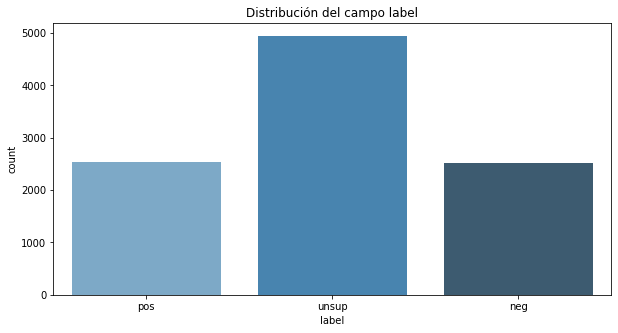

In [7]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
sns.countplot(x="label", data=data_, palette="Blues_d", ax = ax)
ax.set_title('Distribución del campo label')
plt.show()

# unsup: unsupervised


In [8]:
data_labelled = data_[data_.label != 'unsup'].reset_index(drop=True)
print(data_labelled.shape)
data_labelled.head()

(5053, 4)


,type,review,label,file
0,train,Alain Chabat claims this movie as his original...,pos,4295_9.txt
1,test,Okay. To enjoy this silent comedy short you MU...,pos,11636_9.txt
2,test,Now we know where they got the idea of Snakes ...,neg,3615_1.txt
3,train,"Okay, 'enjoy' is a pretty relative term, but f...",neg,611_4.txt
4,test,Truly a great leap forward in the perfection o...,neg,7307_1.txt


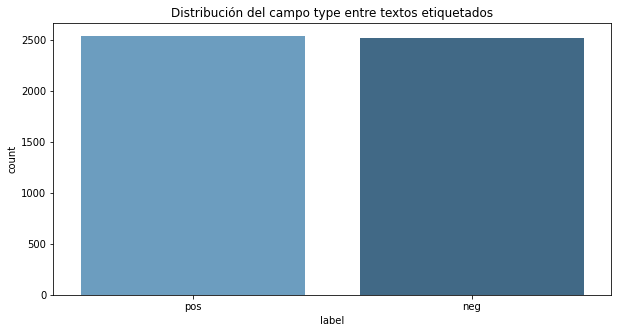

In [9]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1)
sns.countplot(x="label", data=data_labelled, palette="Blues_d", ax = ax)
ax.set_title('Distribución del campo type entre textos etiquetados')
plt.show()

In [10]:
data_train = data_labelled[data_labelled["type"] == 'train'][["review", "label"]]
data_test = data_labelled[data_labelled["type"] == "test"][["review", "label"]]
print(data_train.shape,data_test.shape)

print(data_train.head())

(2504, 2) (2549, 2)
                                              review label
0  Alain Chabat claims this movie as his original...   pos
3  Okay, 'enjoy' is a pretty relative term, but f...   neg
5  Why oh why don't blockbuster movies simply sti...   neg
6  Okay this movie fine like I said but you surel...   pos
7  Corridors of time. The movie you can watch if ...   neg


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


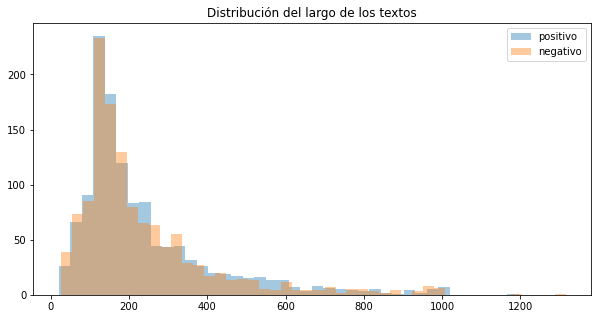

In [11]:
lenghts_pos = []
lenghts_neg = []

for sentence, label in zip(data_train['review'],data_train['label']):
  if label == 'neg':
    lenghts_neg.append(len(sentence.lower().split()))
  if label == 'pos':
    lenghts_pos.append(len(sentence.lower().split()))

print("\n")
fig, ax = plt.subplots(figsize=(10,5),nrows=1)

sns.distplot(lenghts_pos, hist=True, kde=False, norm_hist=False, label='positivo',ax=ax)
sns.distplot(lenghts_neg,hist=True, kde=False, norm_hist=False, label='negativo',ax=ax)
ax.set_title('Distribución del largo de los textos')
ax.legend()
plt.show()


In [12]:
for i, sentence in zip(data_train.index, data_train['review']):
    data_train.loc[i, "length"] = len(sentence.lower().split())

In [13]:
data_train

,review,label,length
0,Alain Chabat claims this movie as his original...,pos,164.0
3,"Okay, 'enjoy' is a pretty relative term, but f...",neg,135.0
5,Why oh why don't blockbuster movies simply sti...,neg,74.0
6,Okay this movie fine like I said but you surel...,pos,159.0
7,Corridors of time. The movie you can watch if ...,neg,115.0
...,...,...,...
5047,well i was a teenager when i saw the movie..th...,pos,285.0
5048,Save the $8.97 you'll spend at Walmart to buy ...,neg,431.0
5050,"As Dr. Alan Feinstone, Corbin Bernsen turns a ...",pos,158.0
5051,"A few years ago, I bought several $1 DVD's tha...",pos,227.0


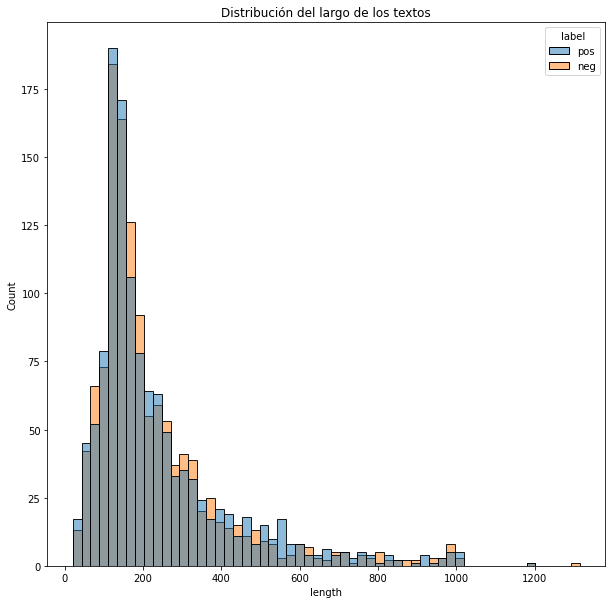

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Distribución del largo de los textos')

sns.histplot(data=data_train, x="length", hue="label", kde = False, ax = ax)


In [15]:
# dejamos el dataset como estaba antes 
data_train.drop(columns=['length'])

,review,label
0,Alain Chabat claims this movie as his original...,pos
3,"Okay, 'enjoy' is a pretty relative term, but f...",neg
5,Why oh why don't blockbuster movies simply sti...,neg
6,Okay this movie fine like I said but you surel...,pos
7,Corridors of time. The movie you can watch if ...,neg
...,...,...
5047,well i was a teenager when i saw the movie..th...,pos
5048,Save the $8.97 you'll spend at Walmart to buy ...,neg
5050,"As Dr. Alan Feinstone, Corbin Bernsen turns a ...",pos
5051,"A few years ago, I bought several $1 DVD's tha...",pos


## Pre-procesamiento del Texto


### Extracción de Tokens

1.   Lower-casing
2.   Remoción de Stop-words (adornan el lenguaje pero no aportan a lo que queremos)
3.   Lematización (transformar palabras a su origen lenguistico).

In [16]:
'''
NLTK is a leading platform for building Python programs to work with human language data.
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, 
along with a suite of text processing libraries for classification, tokenization, stemming, 
tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
'''
import nltk 
nltk.download('wordnet') # WordNet® is a large lexical database of English. 
nltk.download('stopwords') 
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.snowball import SnowballStemmer # para transformar palabrasa a su raiz
from nltk.stem import WordNetLemmatizer # 

tokenizer = TfidfVectorizer().build_tokenizer() #Return a function that splits a string into a sequence of tokens considering unicode characters
stemmer = SnowballStemmer("english") 
lemmatizer = WordNetLemmatizer()

##stop-words: el vectorizador ya las remueve pero para mostrar las palabras más frecuente tiene sentido activarlo
remove_stops_here = False

def my_pre_processer(text, debug = False):
    results = []
    if (debug):
        print("Tokenizer result: ", tokenizer(text))
    for token in tokenizer(text):
        clean_token = token.lower().strip('-').strip('_')
        if remove_stops_here and (clean_token in stopwords.words('english')):
          continue
        #token_pro = stemmer.stem(clean_token) #podemos probar stemming en vez de lematizacion
        token_pro = lemmatizer.lemmatize(clean_token) 
        if len(token_pro) > 2 and not token_pro[0].isdigit(): #elimina palabra largo menor a 2
            results.append(token_pro)
    return results


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# algunos ejemplos para comparar stemmer y lemmatizer

#word = 'dogs'
word = 'universities'
#word = 'easily'
print( stemmer.stem(word) ) 
print( lemmatizer.lemmatize(word) )

univers
university


In [18]:
# ejemplo de aplicacion
pd.set_option('display.max_colwidth', None)
texto_ejemplo = data_train.loc[100]["review"]

print(data_train.loc[100]["label"])
texto_ejemplo


pos


'I\'ve watched this movie a second time to try to figure out why it wasn\'t as successful (commercially or artistically) as it should have been, and discovered considerable artistic merit--which may ultimately have been its commercial undoing.<br /><br />First of all, this movie attempts "serious" science-fiction, social commentary, more than action-adventure. There is action in it, but that\'s not really what it\'s about. If you focus on that, you\'ll end up with (as others have noted) a bad "Aliens" clone. But, again, that\'s not what it\'s about.<br /><br />The movie is really about Todd\'s (Kurt Russell) transformation from human to near-machine and back to human (mostly *back*). But because it\'s not trying to give you a typically glib Hollywood style answer, Kurt Russell must make this transformation without speaking, and largely without broad expressions. And he really does a wonderful job--it can take two viewings to appreciate it.<br /><br />The surrounding "social logic" is f

In [19]:
print(len(texto_ejemplo.split(' ')))
result = my_pre_processer(texto_ejemplo, True)

print(result)
print(len(result))

201
Tokenizer result:  ['ve', 'watched', 'this', 'movie', 'second', 'time', 'to', 'try', 'to', 'figure', 'out', 'why', 'it', 'wasn', 'as', 'successful', 'commercially', 'or', 'artistically', 'as', 'it', 'should', 'have', 'been', 'and', 'discovered', 'considerable', 'artistic', 'merit', 'which', 'may', 'ultimately', 'have', 'been', 'its', 'commercial', 'undoing', 'br', 'br', 'First', 'of', 'all', 'this', 'movie', 'attempts', 'serious', 'science', 'fiction', 'social', 'commentary', 'more', 'than', 'action', 'adventure', 'There', 'is', 'action', 'in', 'it', 'but', 'that', 'not', 'really', 'what', 'it', 'about', 'If', 'you', 'focus', 'on', 'that', 'you', 'll', 'end', 'up', 'with', 'as', 'others', 'have', 'noted', 'bad', 'Aliens', 'clone', 'But', 'again', 'that', 'not', 'what', 'it', 'about', 'br', 'br', 'The', 'movie', 'is', 'really', 'about', 'Todd', 'Kurt', 'Russell', 'transformation', 'from', 'human', 'to', 'near', 'machine', 'and', 'back', 'to', 'human', 'mostly', 'back', 'But', 'becau

In [20]:
# lo aplicamos a nuestros datos
data_train['prep_review'] = data_train['review'].apply(my_pre_processer)
data_train.head(1)

,review,label,length,prep_review
0,"Alain Chabat claims this movie as his original idea but the theme of reluctant lovers who finally get it together is as old, if not older, than Shakespeare.<br /><br />Chabat is a ""vieux garcon"", happily single and not wanting any member of the opposite sex to disturb his life. He has a problem, 5 sisters and a matriarchal mum - the G7 - who decide he should be married. Enter the delightful, charming Charlotte Gainsbourg and what should be a simple plan. Charlotte has to pose as Chabat's girlfriend and then simply not turn up on the day of the wedding. No more talk of marriage from the G7. Of course the best laid plans have a habit of spiralling out of control.<br /><br />There are very strong supporting roles from Lafont as the mother and Osterman as the tight-fisted brother of Gainsbourg.<br /><br />There are some fantastic scenes as first Charlotte has to charm, then revolt the family. French farce with an English.",pos,164.0,"[alain, chabat, claim, this, movie, his, original, idea, but, the, theme, reluctant, lover, who, finally, get, together, old, not, older, than, shakespeare, chabat, vieux, garcon, happily, single, and, not, wanting, any, member, the, opposite, sex, disturb, his, life, problem, sister, and, matriarchal, mum, the, who, decide, should, married, enter, the, delightful, charming, charlotte, gainsbourg, and, what, should, simple, plan, charlotte, pose, chabat, girlfriend, and, then, simply, not, turn, the, day, the, wedding, more, talk, marriage, from, the, course, the, best, laid, plan, have, habit, spiralling, out, control, there, are, very, strong, supporting, role, from, lafont, the, mother, and, osterman, the, ...]"


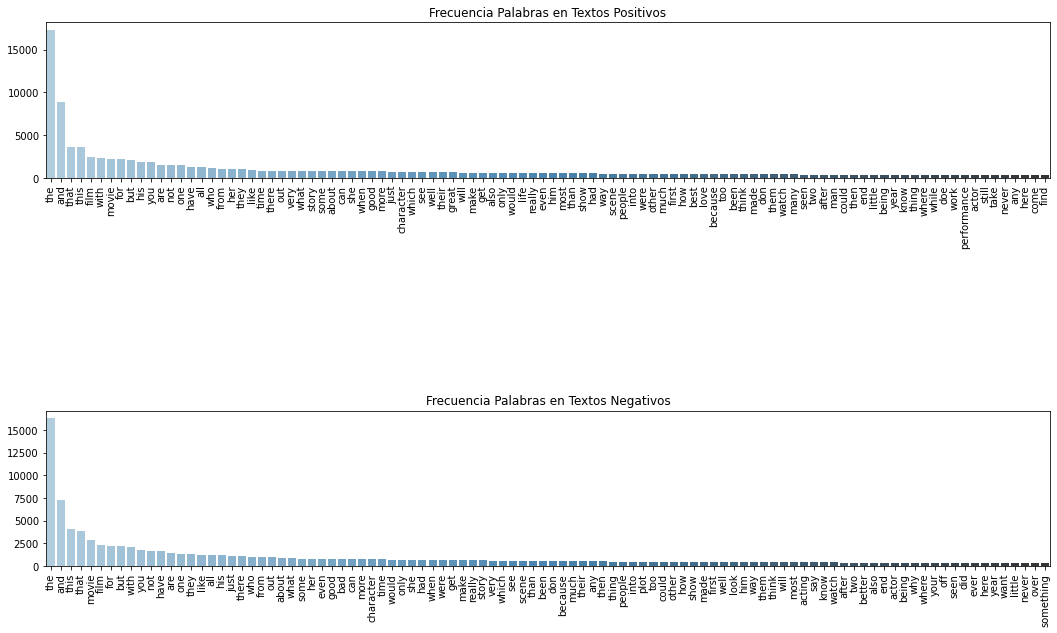

In [21]:
all_tokens_pos = [token for sublist in data_train[data_train.label=='pos'].prep_review for token in sublist]
all_tokens_neg = [token for sublist in data_train[data_train.label=='neg'].prep_review for token in sublist]

from collections import Counter
freqs_pos = Counter(all_tokens_pos)
freqs_neg = Counter(all_tokens_neg)

sorted_words_pos  =  {k: v for k, v in sorted(freqs_pos.items(), key=lambda item: item[1], reverse=True)}
sorted_words_neg =  {k: v for k, v in sorted(freqs_neg.items(), key=lambda item: item[1], reverse=True)}

top = 100
y_pos = [float(y) for y in sorted_words_pos.values()]
x_pos = [x for x in sorted_words_pos.keys()]
y_neg = [float(y) for y in sorted_words_neg.values()]
x_neg = [x for x in sorted_words_neg.keys()]


fig, ax = plt.subplots(figsize=(18,10),nrows=2)
p1 = sns.barplot(x=x_pos[:top],y=y_pos[:top],palette="Blues_d",ax=ax[0])
p2 = sns.barplot(x=x_neg[:top],y=y_neg[:top],palette="Blues_d",ax=ax[1])
ax[0].set_title('Frecuencia Palabras en Textos Positivos')
ax[1].set_title('Frecuencia Palabras en Textos Negativos')
plt.subplots_adjust(hspace=1.5)
plt.setp(p1.get_xticklabels(), rotation=90)
plt.setp(p2.get_xticklabels(), rotation=90)
plt.show()

# notar que bad no esta en textos positivo

# Vectorización

Tenemos 3 opciones, porque tenemos 3 representaciones posibles para el texto, podemos utilizar las tres representaciones con los diferentes clasificadores,
pero no todas ellas tienen sentido 

¿cuales son las combinaciones correctas?
¿bayes ingenuo binomial tendra sentido con una representacion real? ¿tendra sentido con una representacion binaria?
¿tendra sentido con una representacion discreta de tipo TF?

In [22]:
from sklearn.model_selection import train_test_split


## Representación Binaria (Palabra está o no está)


![texto alternativo](https://i.stack.imgur.com/8ARA1.png)

*Ejemplo de n-gramas* 


In [48]:
# antes de todo almacenamos las etiquetas (pos o neg) correspondiente a cada ejemplo de entrenamiento
y_train = data_train['label']

# y almacenamos las etiquetas correspondientes al conjunto de testing
y_test = data_test['label']

print(y_train.shape, y_test.shape)

(2504,) (2549,)


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# Bag of words, contar la cantidad de veces que aparece la palabra de un diccionario en el texto que intentamos clasificar 
# El diccionario, o lo descargamos nosotros o lo creamos concatenando nuestras palabras. Esto ultimo se hace aca.

# combinaciones de palabras mas frecuentes. build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
max_features = 10000 

max_df = 0.8
min_df = 21

### NUMBER OF N GRAMS TO CONSIDER
# Contar ya no las veces que ocurren las palabras, sino contar las 
# veces que aparecer conjuntos de palabras. Que sea 1 es que solo 1 palabra. Si es > 1 se hace lento el procesamiento. 
ngram_max = 4

################ vectoriza el texto  ####################################################

# toda esta pipeline se hace con esta libreria. CoutVectorizer vectoriza el texto
vectorizer = CountVectorizer(stop_words='english', tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                              binary=True, ngram_range=(1, ngram_max))


vectorizer.fit(data_train['review']) # fitear el vectorizer solo con data_train  

binary_train = vectorizer.transform(data_train['review']) # aplicar la transformacion a data_train para obtener binary_train

########################################################################################

#Aprovechamos de crear datos para validacion. Para ello dividimos data_test en 2 subconjuntos: uno para validacion y otro para test.  

x_val, x_test, y_val, y_test = train_test_split(data_test, y_test, test_size=0.5, random_state=42) # defimos un validation set

# aplicamos el vectorizer "fiteado" a los nuevos subconjuntos
binary_val = vectorizer.transform(x_val['review']) # datos de validacion
binary_test = vectorizer.transform(x_test['review']) # datos de test 

print("\nX,y Train Shapes:", binary_train.shape, y_train.shape)
print("X,y Val Shapes:", binary_val.shape, y_val.shape)
print("X,y Test Shapes:", binary_test.shape, y_test.shape)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"



X,y Train Shapes: (2504, 2024) (2504,)
X,y Val Shapes: (1274, 2024) (1274,)
X,y Test Shapes: (1275, 2024) (1275,)


Vamos un poco la matriz binaria

In [50]:
# veamos la matriz
binary_train.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]])

In [51]:
# veamos los feature
print(len(vectorizer.get_feature_names()))
vectorizer.get_feature_names()

2024


['ability',
 'able',
 'absolute',
 'absolutely',
 'absurd',
 'accent',
 'accept',
 'accident',
 'according',
 'accurate',
 'act',
 'acted',
 'acting',
 'action',
 'action film',
 'action movie',
 'actor',
 'actress',
 'actual',
 'actually',
 'adam',
 'adaptation',
 'add',
 'added',
 'addition',
 'admit',
 'adult',
 'adventure',
 'advice',
 'affair',
 'afraid',
 'african',
 'age',
 'aged',
 'agent',
 'ago',
 'agree',
 'ahead',
 'air',
 'ala',
 'alien',
 'alive',
 'allen',
 'allow',
 'allowed',
 'allows',
 'amateur',
 'amazing',
 'america',
 'american',
 'amusing',
 'andy',
 'angel',
 'angle',
 'angry',
 'animal',
 'animated',
 'animation',
 'anne',
 'annoying',
 'answer',
 'anthony',
 'anti',
 'anybody',
 'anymore',
 'apart',
 'apartment',
 'apparent',
 'apparently',
 'appeal',
 'appealing',
 'appear',
 'appearance',
 'appeared',
 'appears',
 'appreciate',
 'approach',
 'area',
 'aren',
 'arm',
 'army',
 'art',
 'artist',
 'artistic',
 'asian',
 'aside',
 'ask',
 'asked',
 'asks',
 'asp

In [52]:
# contenemos n gramas > 1
cont = 0
for feature in vectorizer.get_feature_names():
    if ( len(feature.split(' ')) > 1 ):
         cont+= 1

print(cont)

173


### Bayes Ingenuo Binomial 

In [53]:
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, average_precision_score


def NBC(x_train, y_train, x_val, y_val, x_test, y_test):

    clf = BernoulliNB(alpha=1) # suavisamiento laplasiano, lo de los priors. (diapo 25 tema 3). "Que algo no ha pasado no quiere decir que no vaya a ocurrrir" 
    clf.fit(x_train, y_train) # ajustar con datos de entrenamiento 

    s_train = clf.score(x_train, y_train)

    print("Score Train: ", s_train)

    scores_val = clf.predict_proba(x_val)[:,1]
    labels = clf.classes_
    pos_class = labels[1]

    fpr_, tpr_, thresholds_ = roc_curve(y_val, scores_val, pos_label=pos_class) 
    precision_, recall_, thrs_ = precision_recall_curve(y_val, scores_val, pos_label=pos_class)

    auc_ = auc(fpr_, tpr_) # area bajo la curva ROC
    aupr_ = average_precision_score(y_val, scores_val, pos_label=pos_class)  # area bajo la curva PR

    print("\n Positive Class is: %s"%pos_class)
    print("AUC is %f"%auc_) 
    print("AUPR is %f"%aupr_)

    fig, ax = plt.subplots(figsize=(18,5),nrows=1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_, tpr_, label='BNB')
    ax.set_title("ROC Curve")
    ax.set_xlabel("False Positive Rate (1-Especificidad)")
    ax.set_ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')
    plt.show()

    fig, ax = plt.subplots(figsize=(18,5),nrows=1)
    plt.plot(recall_, precision_, label='BNB')
    ax.set_title("PR Curve")
    ax.set_xlabel("Precision")
    ax.set_ylabel("Recall")
    plt.legend(loc='best')
    plt.show()

    print("\n")
    disp = plot_confusion_matrix(clf, x_test, y_test, display_labels=labels, cmap=plt.cm.Blues,normalize='all')
    disp.ax_.set_title("confusion BNB Test")

    print(disp.confusion_matrix)


    # Curva ROC: mientras mas area mejor. Deberia estar pegada al escalon de 0 a 1 (eje y) al inicio
    # un clasificador trivial obtiene la diagonal, por eso se grafica con al curva ROC. Cualquier cosa sobre la linea es mejor que aleatorio. 
    # Si la tasa de False Positivo es 60%, la tasa de Verdaderos negativos seria de 40%

    # Curva PR: mientras mas area mejor, deberia estar pegada al escalon de 1 a 0 (eje y) al final


Score Train:  0.8829872204472844

 Positive Class is: pos
AUC is 0.897119
AUPR is 0.898908


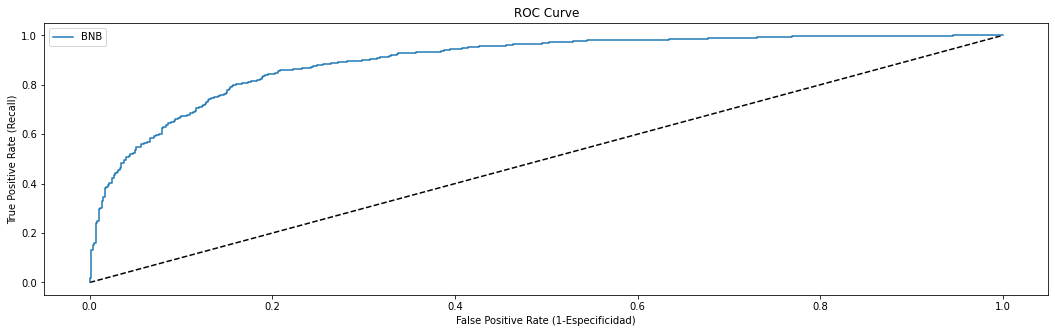

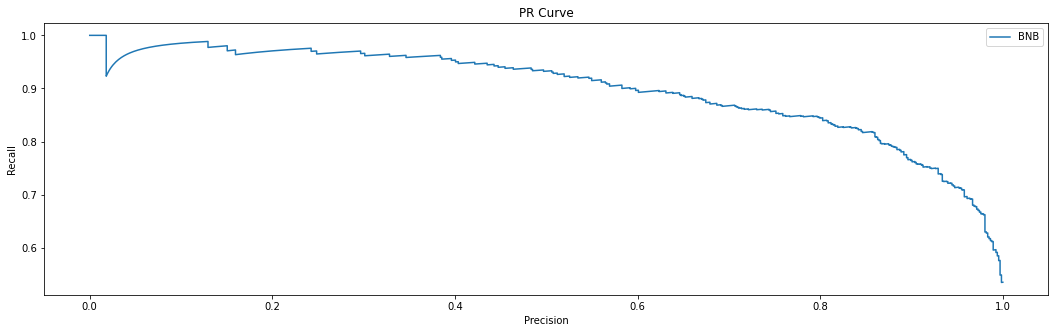



[[0.42901961 0.08392157]
 [0.07843137 0.40862745]]


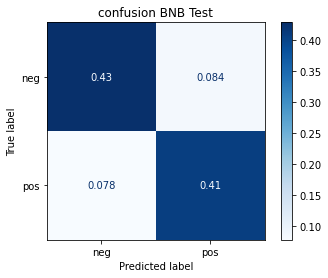

In [54]:
NBC(binary_train, y_train, binary_val, y_val, binary_test, y_test)


## Representación TF (Número de veces que una palabra está) (Representacion discreta)

In [30]:
# antes de todo almacenamos las etiquetas (pos o neg) correspondiente a cada ejemplo de entrenamiento
y_train = data_train['label']

# y almacenamos las etiquetas correspondientes al conjunto de testing
y_test = data_test['label']

print(y_train.shape, y_test.shape)

(2504,) (2549,)


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer 

ngram_max =1
max_features = 10000 # limitar el numero de caracteristicas a utilizar, las 10 mil palabras o combinaciones de palabras mas frecuentes
max_df=0.8
min_df=1

vectorizer = CountVectorizer(stop_words='english',tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                              binary=False, ngram_range=(1, ngram_max)) # ahora, Binary es False 

vectorizer.fit(data_train['review']) # fitear el vectorizer solo con data_train  

discrete_train = vectorizer.transform(data_train['review']) # aplicar la transformacion a data_train para obtener discrete_train

########################################################################################

#Aprovechamos de crear datos para validacion. Para ello dividimos data_test en 2 subconjuntos: uno para validacion y otro para test.  

x_val, x_test, y_val, y_test = train_test_split(data_test, y_test, test_size=0.5, random_state=42) # defimos un validation set

# aplicamos el vectorizer "fiteado" a los nuevos subconjuntos
discrete_val = vectorizer.transform(x_val['review']) # datos de validacion
discrete_test = vectorizer.transform(x_test['review']) # datos de test 

print("\nX,y Train Shapes:", discrete_train.shape, y_train.shape)
print("X,y Val Shapes:", discrete_val.shape, y_val.shape)
print("X,y Test Shapes:", discrete_test.shape, y_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"



X,y Train Shapes: (2504, 10000) (2504,)
X,y Val Shapes: (1274, 10000) (1274,)
X,y Test Shapes: (1275, 10000) (1275,)


In [32]:
# veamos algunos valores de la matriz
print(np.max(discrete_train)) # el maximo 
print(np.min(discrete_train[np.nonzero(discrete_train)])) # el minimo

30
1


### Bayes Ingenuo Binomial 

¿tiene sentido usar este modelo con esta representación?

Score Train:  0.9361022364217252

 Positive Class is: pos
AUC is 0.887268
AUPR is 0.887607


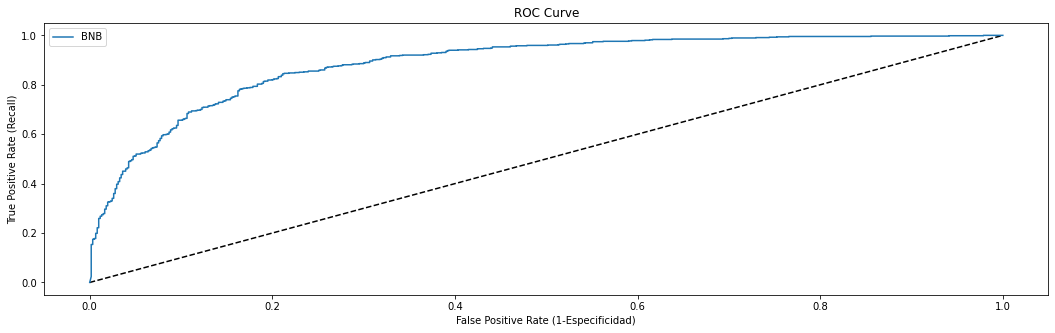

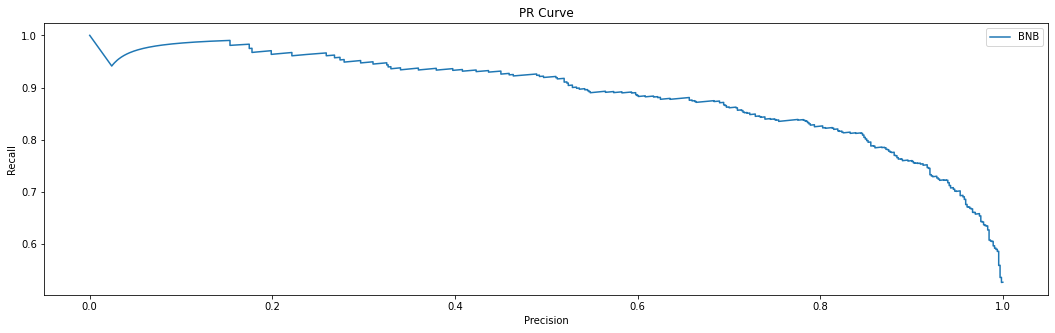



[[0.44705882 0.06588235]
 [0.13019608 0.35686275]]


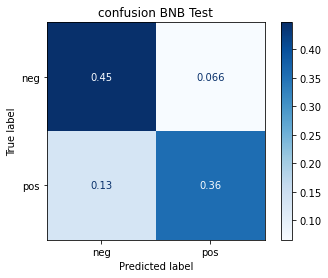

In [33]:
NBC(discrete_train, y_train, discrete_val, y_val, discrete_test, y_test)


## Representación TF-IDF

In [34]:
# antes de todo almacenamos las etiquetas (pos o neg) correspondiente a cada ejemplo de entrenamiento
y_train = data_train['label']

# y almacenamos las etiquetas correspondientes al conjunto de testing
y_test = data_test['label']

print(y_train.shape, y_test.shape)

(2504,) (2549,)


In [35]:
## lo que tenemos es que no solo contamos el numero de veces que aparece cada palabra, sino que vamos a corregir ese contador 
#  por lo que se llama "frecuencia inversa del documento" => si una palabra aparece en muchos textos, es muy probable que no sea una palabra 
#  que contiene informacion sobre la clase o sobre las caracteristicas de un texto especifico, "casi un stop word".
# Se pesa de manera inversa al su aparicion en el corpus. Los atributos ahora son números reales.

ngram_max = 1
max_features = 10000 # 10mil numeros reales
max_df=0.8
min_df=1

vectorizer = TfidfVectorizer(stop_words='english',tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                              binary=False, use_idf=True, smooth_idf=True, norm=None, ngram_range=(1, ngram_max))

vectorizer.fit(data_train['review'])

vector_train = vectorizer.transform(data_train['review'])

########################################################################################

#Aprovechamos de crear datos para validacion. Para ello dividimos data_test en 2 subconjuntos: uno para validacion y otro para test.  

x_val, x_test, y_val, y_test = train_test_split(data_test, y_test, test_size=0.5, random_state=42) # defimos un validation set

# aplicamos el vectorizer "fiteado" a los nuevos subconjuntos
vector_val = vectorizer.transform(x_val['review']) # datos de validacion
vector_test = vectorizer.transform(x_test['review']) # datos de test 

print("\nX,y Train Shapes:", vector_train.shape, y_train.shape)
print("X,y Val Shapes:", vector_val.shape, y_val.shape)
print("X,y Test Shapes:", vector_test.shape, y_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"



X,y Train Shapes: (2504, 10000) (2504,)
X,y Val Shapes: (1274, 10000) (1274,)
X,y Test Shapes: (1275, 10000) (1275,)


In [36]:
# veamos algunos valores de la matriz
print(np.max(vector_train)) # el maximo 
print(np.min(vector_train[np.nonzero(vector_train)])) # el minimo

178.92373032509843
1.4383347744379245


### Bayes Ingenuo Binomial 

¿tiene sentido usar este modelo con esta representación?

Score Train:  0.9361022364217252

 Positive Class is: pos
AUC is 0.887268
AUPR is 0.887607


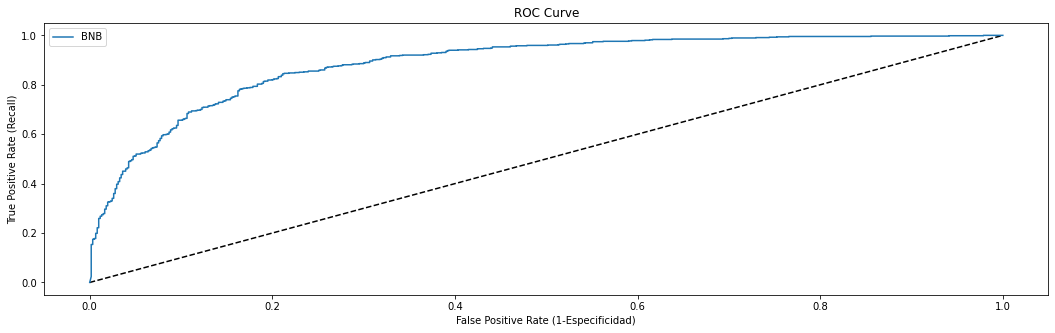

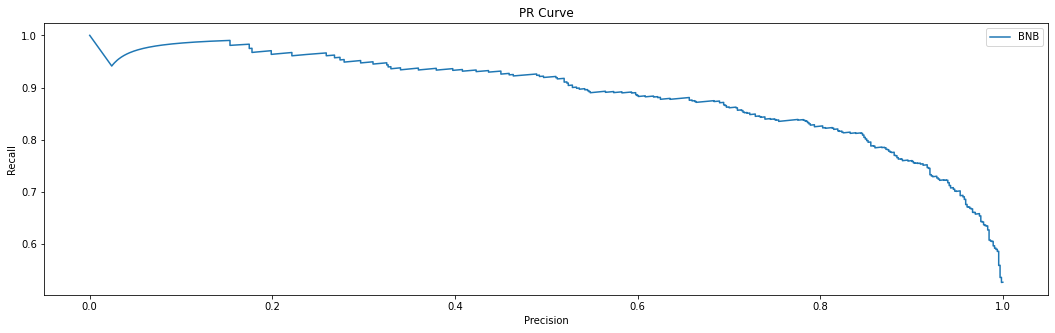



[[0.44705882 0.06588235]
 [0.13019608 0.35686275]]


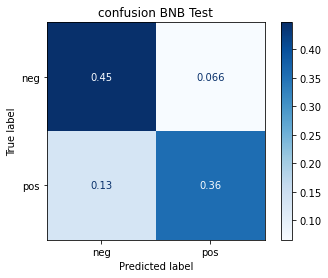

In [37]:
NBC(vector_train, y_train, vector_val, y_val, vector_test, y_test)


## Bayes Ingenuo Multinomial

In [38]:
# antes de todo almacenamos las etiquetas (pos o neg) correspondiente a cada ejemplo de entrenamiento
y_train = data_train['label']

# y almacenamos las etiquetas correspondientes al conjunto de testing
y_test = data_test['label']

print(y_train.shape, y_test.shape)

(2504,) (2549,)


In [39]:

ngram_max =1
max_features = 10000 # limitar el numero de caracteristicas a utilizar, las 10 mil palabras o combinaciones de palabras mas frecuentes
max_df=0.8
min_df=1

vectorizer = CountVectorizer(stop_words='english',tokenizer=my_pre_processer,min_df=min_df, max_df=max_df, max_features=max_features,
                              binary=False, ngram_range=(1, ngram_max)) # ahora, Binary es False 

vectorizer.fit(data_train['review']) # fitear el vectorizer solo con data_train  

discrete_train = vectorizer.transform(data_train['review']) # aplicar la transformacion a data_train para obtener discrete_train

########################################################################################

#Aprovechamos de crear datos para validacion. Para ello dividimos data_test en 2 subconjuntos: uno para validacion y otro para test.  

x_val, x_test, y_val, y_test = train_test_split(data_test, y_test, test_size=0.5, random_state=42) # defimos un validation set

# aplicamos el vectorizer "fiteado" a los nuevos subconjuntos
discrete_val = vectorizer.transform(x_val['review']) # datos de validacion
discrete_test = vectorizer.transform(x_test['review']) # datos de test 

print("\nX,y Train Shapes:", discrete_train.shape, y_train.shape)
print("X,y Val Shapes:", discrete_val.shape, y_val.shape)
print("X,y Test Shapes:", discrete_test.shape, y_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"



X,y Train Shapes: (2504, 10000) (2504,)
X,y Val Shapes: (1274, 10000) (1274,)
X,y Test Shapes: (1275, 10000) (1275,)


Score Train:  0.9365015974440895

 Positive Class is: pos
AUC is 0.870121
AUPR is 0.874803


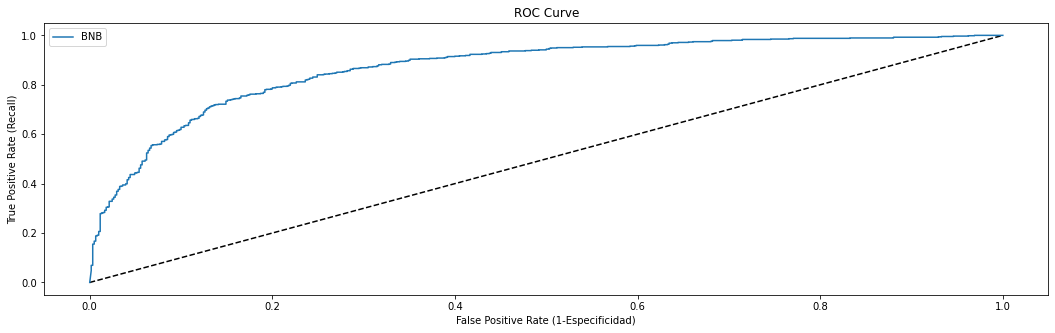

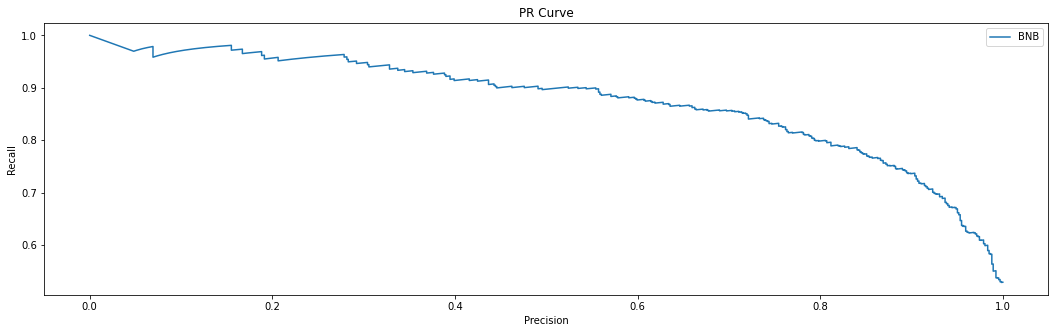



[[0.43137255 0.08156863]
 [0.13098039 0.35607843]]


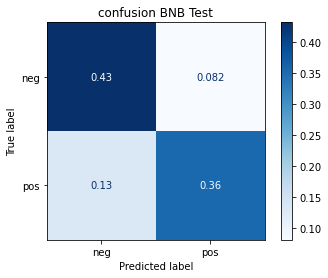

In [40]:
'''
Bayes multinomial trata el texto como secuencia de palabras en vez de bag of words. 
No cuentan las palabras que no estan en el texto. Solo aquellas que si estan. 
¿que representación tiene sentido?
'''
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(alpha=1)
clf.fit(discrete_train, y_train)


s_train = clf.score(discrete_train, y_train)

print("Score Train: ", s_train)

scores_val = clf.predict_proba(discrete_val)[:,1]
labels = clf.classes_
pos_class = labels[1]

fpr_, tpr_, thresholds_ = roc_curve(y_val, scores_val, pos_label=pos_class) 
precision_, recall_, thrs_ = precision_recall_curve(y_val, scores_val, pos_label=pos_class)

auc_ = auc(fpr_, tpr_) # area bajo la curva ROC
aupr_ = average_precision_score(y_val, scores_val, pos_label=pos_class)  # area bajo la curva PR

print("\n Positive Class is: %s"%pos_class)
print("AUC is %f"%auc_) 
print("AUPR is %f"%aupr_)

fig, ax = plt.subplots(figsize=(18,5),nrows=1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_, tpr_, label='BNB')
ax.set_title("ROC Curve")
ax.set_xlabel("False Positive Rate (1-Especificidad)")
ax.set_ylabel("True Positive Rate (Recall)")
plt.legend(loc='best')
plt.show()

fig, ax = plt.subplots(figsize=(18,5),nrows=1)
plt.plot(recall_, precision_, label='BNB')
ax.set_title("PR Curve")
ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
plt.legend(loc='best')
plt.show()

print("\n")
disp = plot_confusion_matrix(clf, discrete_test, y_test, display_labels=labels, cmap=plt.cm.Blues,normalize='all')
disp.ax_.set_title("confusion BNB Test")

print(disp.confusion_matrix)